In [ ]:
!pip install google_play_scraper
!pip install transformers
!pip install plotly_express
!pip install pyyaml
!pip install pattern


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 59.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.5/89.5 kB 7.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 72.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from collections import Counter
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pattern
from pattern.en import lemma
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import string
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [ ]:
data = reviews_all('com.et.market' , sleep_milliseconds = 0, lang = 'en', country = 'US', sort = Sort.NEWEST)

In [ ]:
df = pd.json_normalize(data)
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,34ee9041-07fd-4e04-a72a-a7cf22c4fcb1,Nand Koradiya,https://play-lh.googleusercontent.com/a/AAcHTt...,Wonderful no complaints,5,0,3.7.7,2023-08-21 08:26:54,Dear reader! Thank you for your positive ratin...,2023-08-21 12:44:19,3.7.7
1,76593529-a991-4fb0-9294-c6bb366867ca,Hiren Patel,https://play-lh.googleusercontent.com/a-/AD_cM...,Good app I like it,5,0,3.7.7,2023-08-21 07:15:44,Dear reader! Thank you for your positive ratin...,2023-08-21 12:44:07,3.7.7
2,5c859503-6d50-452d-9aef-ef9919e083da,praveen kr,https://play-lh.googleusercontent.com/a/AAcHTt...,Very Informative Application,5,0,3.7.7,2023-08-21 05:38:51,Dear reader! Thank you for your positive ratin...,2023-08-21 12:43:58,3.7.7
3,0812d777-f10b-4eeb-a5d7-5c1049e113ff,Amrut Parmar,https://play-lh.googleusercontent.com/a/AAcHTt...,Best,5,0,3.7.7,2023-08-21 03:49:26,Dear reader! Thank you for your positive ratin...,2023-08-21 12:43:48,3.7.7
4,11255ef3-6b83-40b0-a3dc-d4c48466a4e9,Hemantkumar Nirban,https://play-lh.googleusercontent.com/a-/AD_cM...,Good app,5,0,3.7.7,2023-08-21 03:12:51,Dear reader! Thank you for your positive ratin...,2023-08-21 12:43:40,3.7.7


In [ ]:
# Convert 'at' column to datetime type
df['at'] = pd.to_datetime(df['at'])

In [ ]:
# Set the 'at' column as the DataFrame index
df.set_index('at', inplace=True)

In [ ]:
# Resample data to get counts per day
daily_review_counts = df['reviewId'].resample('D').count()


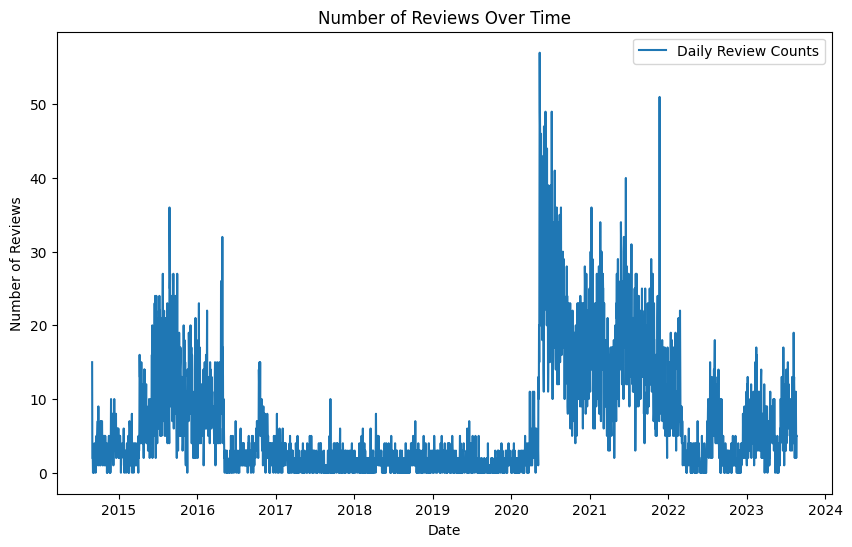

In [ ]:
# Plotting time trends
plt.figure(figsize=(10, 6))
plt.plot(daily_review_counts.index, daily_review_counts.values, label='Daily Review Counts')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()

In [ ]:
# Resample data to get counts per month
monthly_review_counts = df['reviewId'].resample('M').count()


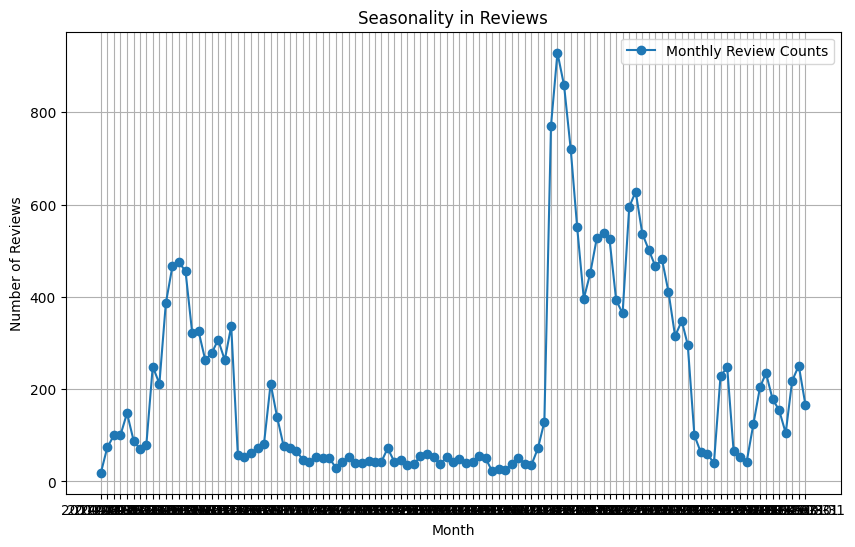

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_review_counts.index, monthly_review_counts.values, marker='o', label='Monthly Review Counts', linestyle='-')
plt.title('Seasonality in Reviews')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.legend()
plt.grid(True)
plt.xticks(monthly_review_counts.index)  # Ensure all months are shown on the x-axis
plt.show()

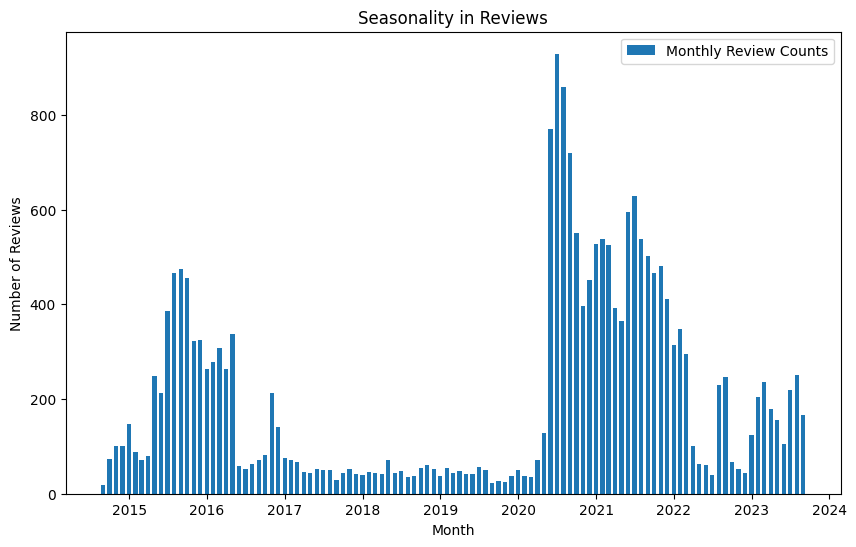

In [ ]:
# Plotting seasonality
plt.figure(figsize=(10, 6))
plt.bar(monthly_review_counts.index, monthly_review_counts.values, width=20, align='center', label='Monthly Review Counts')
plt.title('Seasonality in Reviews')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()

In [ ]:
df.shape

(21841, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21841 entries, 2023-08-21 08:26:54 to 2014-08-29 03:04:50
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              21841 non-null  object        
 1   userName              21841 non-null  object        
 2   userImage             21841 non-null  object        
 3   content               21833 non-null  object        
 4   score                 21841 non-null  int64         
 5   thumbsUpCount         21841 non-null  int64         
 6   reviewCreatedVersion  19419 non-null  object        
 7   replyContent          15022 non-null  object        
 8   repliedAt             15022 non-null  datetime64[ns]
 9   appVersion            19419 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 1.8+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,score,thumbsUpCount
count,21841.000000,21841.000000
mean,4.444256,1.048762
std,1.079580,10.840973
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,941.000000


In [ ]:
df.describe(include=["object"])

,reviewId,userName,userImage,content,reviewCreatedVersion,replyContent,appVersion
count,21841,21841,21841,21833,19419,15022,19419
unique,21841,13624,14123,14295,103,368,103
top,34ee9041-07fd-4e04-a72a-a7cf22c4fcb1,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,2.3.2,"Dear User, We appreciate your positive rating ...",2.3.2
freq,1,7709,7709,1577,1955,4662,1955


In [ ]:
pd.DataFrame({'Count_Missing_Values' : df.isnull().sum()})

,Count_Missing_Values
reviewId,0
userName,0
userImage,0
content,8
score,0
thumbsUpCount,0
reviewCreatedVersion,2422
replyContent,6819
repliedAt,6819
appVersion,2422


In [ ]:
# Drop rows where 'app_version' is missing (None or NaN)
df = df.dropna(subset=['appVersion'])


df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,replyContent,repliedAt,appVersion,appVersionLabel
0,34ee9041-07fd-4e04-a72a-a7cf22c4fcb1,Nand Koradiya,https://play-lh.googleusercontent.com/a/AAcHTt...,wonderful complaint,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:44:19,3.7.7,0
1,76593529-a991-4fb0-9294-c6bb366867ca,Hiren Patel,https://play-lh.googleusercontent.com/a-/AD_cM...,good app like,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:44:07,3.7.7,0
2,5c859503-6d50-452d-9aef-ef9919e083da,praveen kr,https://play-lh.googleusercontent.com/a/AAcHTt...,informative application,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:43:58,3.7.7,0
3,0812d777-f10b-4eeb-a5d7-5c1049e113ff,Amrut Parmar,https://play-lh.googleusercontent.com/a/AAcHTt...,best,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:43:48,3.7.7,0
4,11255ef3-6b83-40b0-a3dc-d4c48466a4e9,Hemantkumar Nirban,https://play-lh.googleusercontent.com/a-/AD_cM...,good app,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:43:40,3.7.7,0


In [ ]:
pd.DataFrame({'Count_Missing_Values' : df.isnull().sum()})

,Count_Missing_Values
reviewId,0
userName,0
userImage,0
content,4
score,0
thumbsUpCount,0
reviewCreatedVersion,0
replyContent,5625
repliedAt,5625
appVersion,0


In [ ]:
#Finding minimum and maximum values
print('Max Score is : ', df['score'].max())
print('Min Score: ', df['score'].min())

Max Score is :  5
Min Score:  1


In [ ]:
[Counter(df['score'])]


[Counter({5: 13986, 2: 458, 1: 982, 4: 3065, 3: 928})]

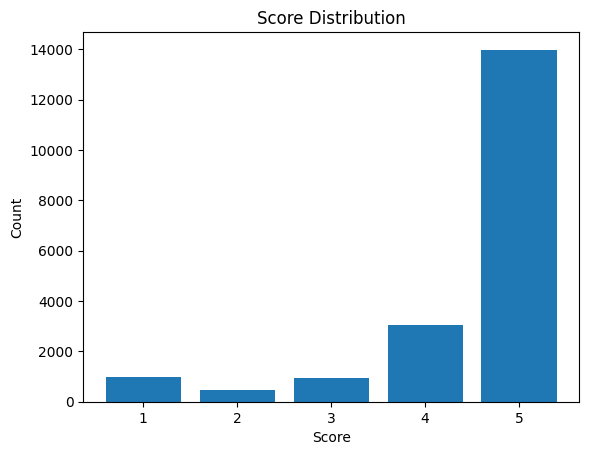

In [ ]:
# Create a Counter object for the 'score' column
score_counter = Counter(df['score'])

# Extract scores and their counts
scores = list(score_counter.keys())
counts = list(score_counter.values())

# Create a bar plot
plt.bar(scores, counts)

# Set labels and title
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score Distribution')

# Show the plot
plt.show()

In [ ]:
[Counter(df['appVersion'])]


[Counter({'3.7.7': 372,
          '3.7.6': 172,
          '3.7.9': 15,
          '3.6.3': 42,
          '3.6.8': 201,
          '3.7.4': 29,
          '3.7.2': 127,
          '3.7.3': 171,
          '3.5.7': 69,
          '3.6.1': 401,
          '1.3.4': 85,
          '3.6.4': 77,
          '3.5.5': 254,
          '3.7.1': 290,
          '3.1.0': 713,
          '2.2.8': 1336,
          '3.6.6': 81,
          '3.7.0': 3,
          '3.6.9': 2,
          '2.1.8': 195,
          '3.5.9': 16,
          '3.1.8': 498,
          '3.6.2': 9,
          '3.6.0': 61,
          '3.5.6': 31,
          '2.3.2': 1955,
          '1.1.9': 403,
          '3.1.3': 163,
          '3.5.1': 582,
          '3.5.4': 248,
          '3.5.8': 32,
          '3.0.2': 548,
          '3.1.6': 547,
          '3.5.3': 92,
          '3.5.2': 90,
          '3.0.6': 571,
          '3.1.9': 161,
          '2.3.1': 546,
          '3.5.0': 15,
          '1.2.5': 264,
          '2.2.2': 23,
          '3.1.7': 100,
          '

In [ ]:
df['reviewCreatedVersion'].value_counts()

2.3.2    1955
2.2.8    1336
3.1.0     713
1.1.4     674
2.2.9     628
         ... 
3.7.0       3
2.0.9       2
2.1.9       2
1.1.5       2
3.6.9       2
Name: reviewCreatedVersion, Length: 103, dtype: int64

<Axes: >

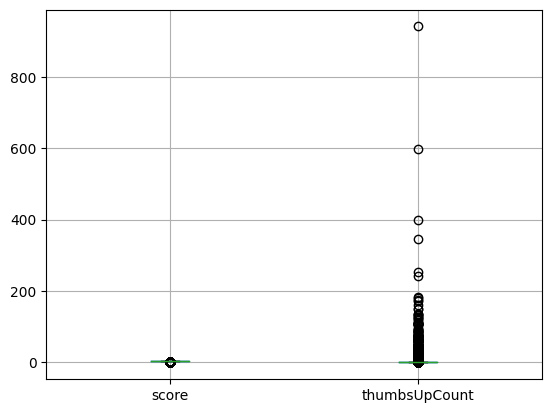

In [ ]:
df.boxplot()

(array([  982.,   458.,   928.,  3065., 13986.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

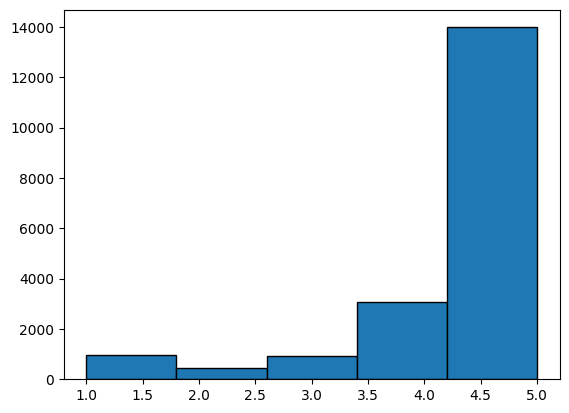

In [ ]:
# Plot histogram of the 'score' column
plt.hist(df['score'], bins=5, edgecolor='black')

In [ ]:
df['score'].mean()

4.473556825789175

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19419 entries, 0 to 19418
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              19419 non-null  object        
 1   userName              19419 non-null  object        
 2   userImage             19419 non-null  object        
 3   content               19415 non-null  object        
 4   score                 19419 non-null  int64         
 5   thumbsUpCount         19419 non-null  int64         
 6   reviewCreatedVersion  19419 non-null  object        
 7   replyContent          13794 non-null  object        
 8   repliedAt             13794 non-null  datetime64[ns]
 9   appVersion            19419 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 1.5+ MB


In [ ]:
# convert to lowercase
df['content']=df['content'].str.lower()
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,replyContent,repliedAt,appVersion,appVersionLabel
0,34ee9041-07fd-4e04-a72a-a7cf22c4fcb1,Nand Koradiya,https://play-lh.googleusercontent.com/a/AAcHTt...,wonderful no complaints,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:44:19,3.7.7,0
1,76593529-a991-4fb0-9294-c6bb366867ca,Hiren Patel,https://play-lh.googleusercontent.com/a-/AD_cM...,good app i like it,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:44:07,3.7.7,0
2,5c859503-6d50-452d-9aef-ef9919e083da,praveen kr,https://play-lh.googleusercontent.com/a/AAcHTt...,very informative application,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:43:58,3.7.7,0
3,0812d777-f10b-4eeb-a5d7-5c1049e113ff,Amrut Parmar,https://play-lh.googleusercontent.com/a/AAcHTt...,best,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:43:48,3.7.7,0
4,11255ef3-6b83-40b0-a3dc-d4c48466a4e9,Hemantkumar Nirban,https://play-lh.googleusercontent.com/a-/AD_cM...,good app,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:43:40,3.7.7,0


In [ ]:
if 'content' in df:
    text = str(df['content'])  # Ensure 'content' is a string
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Rest of your processing with 'tokens'


In [ ]:
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(' '.join(tokens))

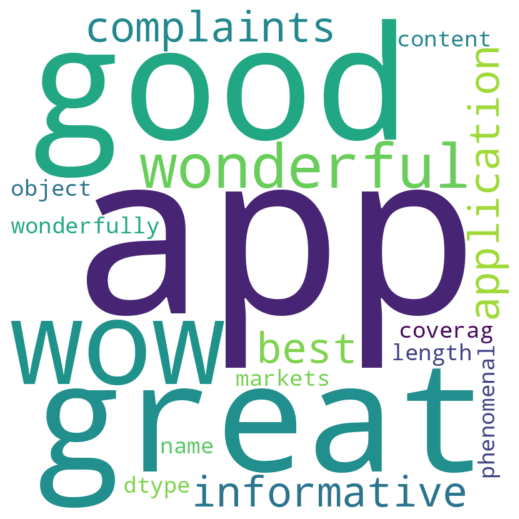

In [ ]:
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# remove puntuation
df['content'] = df['content'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ',str(x)))

In [ ]:
# Tokenization
df['content'] = df['content'].apply(lambda x: word_tokenize(x))

In [ ]:
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

In [ ]:
# Remove stopwords
stopwords = set(stopwords.words('english'))
df['content'] = df['content'].apply(lambda x: [word for word in x if word.lower() not in stopwords])

In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['content'] = df['content'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
# Join tokens into a single string
df['content'] = df['content'].apply(lambda x: ' '.join(x))

In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,replyContent,repliedAt,appVersion,appVersionLabel
0,34ee9041-07fd-4e04-a72a-a7cf22c4fcb1,Nand Koradiya,https://play-lh.googleusercontent.com/a/AAcHTt...,wonderful complaint,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:44:19,3.7.7,0
1,76593529-a991-4fb0-9294-c6bb366867ca,Hiren Patel,https://play-lh.googleusercontent.com/a-/AD_cM...,good app like,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:44:07,3.7.7,0
2,5c859503-6d50-452d-9aef-ef9919e083da,praveen kr,https://play-lh.googleusercontent.com/a/AAcHTt...,informative application,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:43:58,3.7.7,0
3,0812d777-f10b-4eeb-a5d7-5c1049e113ff,Amrut Parmar,https://play-lh.googleusercontent.com/a/AAcHTt...,best,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:43:48,3.7.7,0
4,11255ef3-6b83-40b0-a3dc-d4c48466a4e9,Hemantkumar Nirban,https://play-lh.googleusercontent.com/a-/AD_cM...,good app,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:43:40,3.7.7,0


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores("Great app")

{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}

In [ ]:
res = {}
for i,row in tqdm(df.iterrows()):
  text = row['content']
  myid = row['reviewId']
  res[myid] = sia.polarity_scores(text)


0it [00:00, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T


In [ ]:
vaders = vaders.reset_index().rename(columns={'index' : 'reviewId'})
vaders = vaders.merge(df, how = 'left')



In [ ]:
vaders.head()

,reviewId,neg,neu,pos,compound,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,replyContent,repliedAt,appVersion,appVersionLabel
0,34ee9041-07fd-4e04-a72a-a7cf22c4fcb1,0.373,0.000,0.627,0.3612,Nand Koradiya,https://play-lh.googleusercontent.com/a/AAcHTt...,wonderful complaint,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:44:19,3.7.7,0
1,76593529-a991-4fb0-9294-c6bb366867ca,0.000,0.156,0.844,0.6597,Hiren Patel,https://play-lh.googleusercontent.com/a-/AD_cM...,good app like,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:44:07,3.7.7,0
2,5c859503-6d50-452d-9aef-ef9919e083da,0.000,1.000,0.000,0.0000,praveen kr,https://play-lh.googleusercontent.com/a/AAcHTt...,informative application,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:43:58,3.7.7,0
3,0812d777-f10b-4eeb-a5d7-5c1049e113ff,0.000,0.000,1.000,0.6369,Amrut Parmar,https://play-lh.googleusercontent.com/a/AAcHTt...,best,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:43:48,3.7.7,0
4,11255ef3-6b83-40b0-a3dc-d4c48466a4e9,0.000,0.256,0.744,0.4404,Hemantkumar Nirban,https://play-lh.googleusercontent.com/a-/AD_cM...,good app,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:43:40,3.7.7,0


In [ ]:
# Function to classify sentiment based on 'compound' value
def classify_sentiment(compound_value):
    if compound_value > 0.05:
        return "positive"
    else:
        return "negative"



In [ ]:
# Apply sentiment classification to the DataFrame
vaders['sentiment'] = vaders['compound'].apply(classify_sentiment)


In [ ]:
vaders.head()

,reviewId,neg,neu,pos,compound,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,replyContent,repliedAt,appVersion,appVersionLabel,sentiment
0,34ee9041-07fd-4e04-a72a-a7cf22c4fcb1,0.373,0.000,0.627,0.3612,Nand Koradiya,https://play-lh.googleusercontent.com/a/AAcHTt...,wonderful complaint,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:44:19,3.7.7,0,positive
1,76593529-a991-4fb0-9294-c6bb366867ca,0.000,0.156,0.844,0.6597,Hiren Patel,https://play-lh.googleusercontent.com/a-/AD_cM...,good app like,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:44:07,3.7.7,0,positive
2,5c859503-6d50-452d-9aef-ef9919e083da,0.000,1.000,0.000,0.0000,praveen kr,https://play-lh.googleusercontent.com/a/AAcHTt...,informative application,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:43:58,3.7.7,0,negative
3,0812d777-f10b-4eeb-a5d7-5c1049e113ff,0.000,0.000,1.000,0.6369,Amrut Parmar,https://play-lh.googleusercontent.com/a/AAcHTt...,best,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:43:48,3.7.7,0,positive
4,11255ef3-6b83-40b0-a3dc-d4c48466a4e9,0.000,0.256,0.744,0.4404,Hemantkumar Nirban,https://play-lh.googleusercontent.com/a-/AD_cM...,good app,5,0,3.7.7,Dear reader! Thank you for your positive ratin...,2023-08-21 12:43:40,3.7.7,0,positive


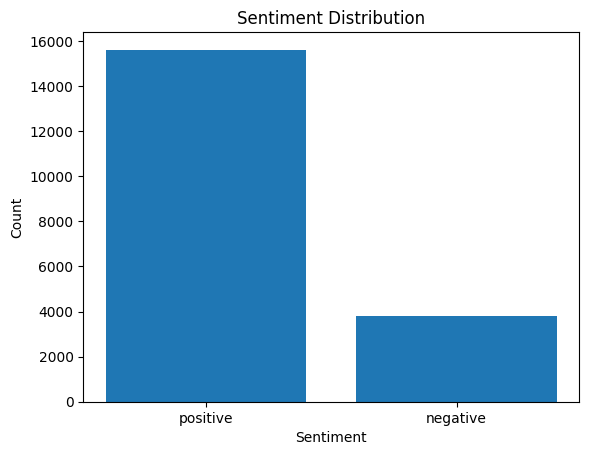

In [ ]:
# Plot sentiment distribution
sentiment_counts = vaders['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# Generate word cloud for positive reviews
positive_reviews = ' '.join(vaders[vaders['sentiment'] == 'positive']['content'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Generate word cloud for negative reviews
negative_reviews = ' '.join(vaders[vaders['sentiment'] == 'negative']['content'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)


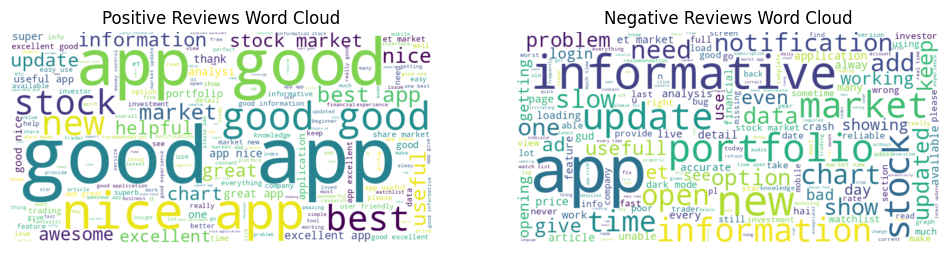

In [ ]:
# Plot word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()

In [ ]:
from scipy.stats import pearsonr, spearmanr

In [ ]:
# Define a threshold for classifying positive sentiment based on compound score
threshold = 0.05  # Adjust this threshold as needed

In [ ]:
# Create a new column to represent predicted sentiment class
vaders['predicted_sentiment'] = np.where(vaders['compound'] >= threshold, 'positive', 'neutral/negative')


In [ ]:
# Calculate Mean Squared Error (MSE)
mse = ((vaders['score'] - vaders['compound'])**2).mean()
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 17.40618049785159


In [ ]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 4.172071487624773


In [ ]:
# Calculate Pearson Correlation Coefficient and p-value
pearson_corr, pearson_pvalue = pearsonr(vaders['score'], vaders['compound'])
print("Pearson Correlation Coefficient:", pearson_corr)
print("Pearson Correlation p-value:", pearson_pvalue)


Pearson Correlation Coefficient: 0.5380241723780385
Pearson Correlation p-value: 0.0


In [ ]:
# Calculate Spearman Rank Correlation Coefficient and p-value
spearman_corr, spearman_pvalue = spearmanr(vaders['score'], vaders['compound'])
print("Spearman Rank Correlation Coefficient:", spearman_corr)
print("Spearman Rank Correlation p-value:", spearman_pvalue)

Spearman Rank Correlation Coefficient: 0.3557332550816416
Spearman Rank Correlation p-value: 0.0


In [ ]:
# Define a threshold for classifying positive sentiment based on compound score
threshold = 0.3  # Adjust this threshold as needed

In [ ]:
# Create a new column to represent predicted sentiment class
vaders['predicted_sentiment'] = np.where(vaders['compound'] >= threshold, 'positive', 'neutral/negative')


In [ ]:
# Calculate Mean Squared Error (MSE)
mse = ((vaders['score'] - vaders['compound'])**2).mean()
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 16.38030718111031


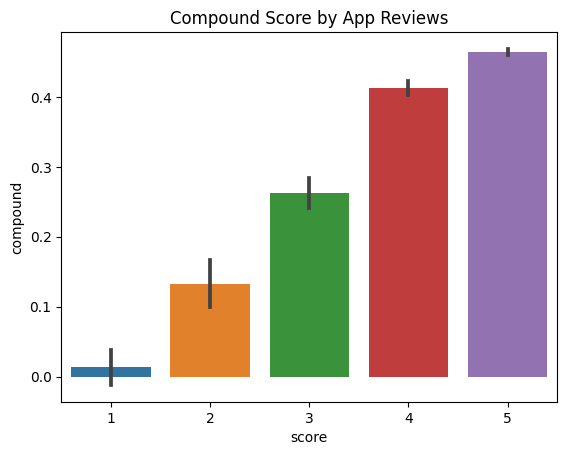

In [ ]:
ax=sns.barplot(data = vaders, x='score', y='compound')
ax.set_title("Compound Score by App Reviews")
plt.show()

Text(0.5, 1.0, 'Negative')

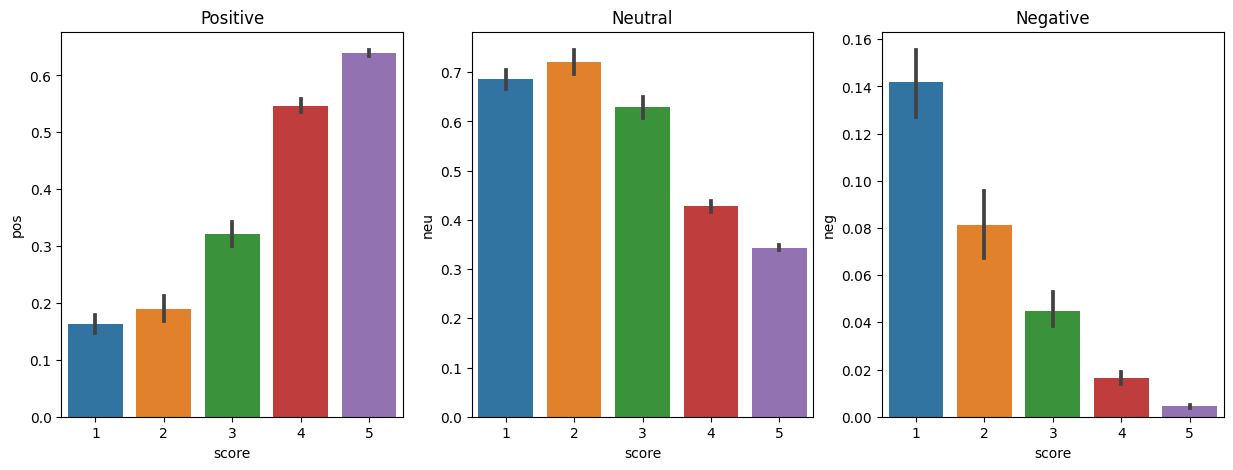

In [ ]:
fig, axs = plt.subplots(1, 3 ,figsize=(15,5))
sns.barplot(data = vaders, x='score', y='pos', ax=axs[0])
sns.barplot(data = vaders, x='score', y='neu', ax=axs[1])
sns.barplot(data = vaders, x='score', y='neg', ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")

In [ ]:
df['reviewCreatedVersion'].value_counts()

2.3.2    1955
2.2.8    1336
3.1.0     713
1.1.4     674
2.2.9     628
         ... 
3.7.0       3
2.0.9       2
2.1.9       2
1.1.5       2
3.6.9       2
Name: reviewCreatedVersion, Length: 103, dtype: int64

In [ ]:
df1 = vaders[(vaders.appVersion == "2.3.2")]
df1['score'].mean()


4.6792838874680305

In [ ]:
df1['sentiment'].value_counts(normalize = True)


positive    0.839386
negative    0.160614
Name: sentiment, dtype: float64

In [ ]:
fig1 = px.histogram(df1, x='sentiment', color = 'sentiment')
fig1

In [ ]:
df2 = vaders[(vaders.appVersion == "2.2.8")]
df2['score'].mean()


4.779940119760479

In [ ]:
df2['sentiment'].value_counts(normalize = True)

positive    0.856287
negative    0.143713
Name: sentiment, dtype: float64

In [ ]:
fig2 = px.histogram(df2, x='sentiment', color = 'sentiment')
fig2

In [ ]:
df3 = vaders[(vaders.appVersion == "3.1.0")]
df3['score'].mean()


4.708274894810659

In [ ]:
df3['sentiment'].value_counts(normalize = True)

positive    0.859748
negative    0.140252
Name: sentiment, dtype: float64

In [ ]:
fig3 = px.histogram(df3, x='sentiment', color = 'sentiment')
fig3

In [ ]:
df4 = vaders[(vaders.appVersion == "1.1.4")]
df4['score'].mean()


4.241839762611276

In [ ]:
df4['sentiment'].value_counts(normalize = True)

positive    0.762611
negative    0.237389
Name: sentiment, dtype: float64

In [ ]:
fig4 = px.histogram(df4, x='sentiment', color = 'sentiment')
fig4

In [ ]:
df5 = vaders[(vaders.appVersion == "2.2.9")]
df5['score'].mean()


4.769108280254777

In [ ]:
df5['sentiment'].value_counts(normalize = True)

positive    0.847134
negative    0.152866
Name: sentiment, dtype: float64

In [ ]:
fig5 = px.histogram(df5, x='sentiment', color = 'sentiment')
fig5

In [ ]:
df6 = vaders[(vaders.appVersion == "4.6.30")]
df6['score'].mean()


4.687086092715232

In [ ]:
df6['sentiment'].value_counts(normalize = True)

positive    0.870861
negative    0.129139
Name: sentiment, dtype: float64

In [ ]:
fig6 = px.histogram(df7, x='sentiment', color = 'sentiment')
fig6